In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
nuances2022 = (
    pd
    .read_csv('lg2022_t1_nuances.csv')
    .set_index('CodCirc2')
    .fillna(False)
)

nuances2022

,DIV,DSV,DVC,DVD,DVG,DXD,DXG,ECO,ENS,LR,NUP,RDG,REC,REG,RN,UDI
CodCirc2,,,,,,,,,,,,,,,,
01001,False,True,False,False,False,False,True,True,True,True,True,False,True,False,True,False
01002,True,True,False,True,False,False,True,True,True,True,True,False,True,False,True,False
01003,True,True,True,False,False,False,True,True,True,True,True,False,True,False,True,False
01004,False,True,True,True,True,False,True,True,True,True,True,True,True,False,True,False
01005,True,True,False,True,True,False,True,False,False,True,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZZ007,True,False,True,True,True,False,False,True,True,True,True,False,True,True,True,False
ZZ008,True,False,True,False,True,False,False,True,True,False,True,True,True,False,True,True
ZZ009,True,False,True,True,True,True,False,False,True,True,True,False,True,False,True,False


In [3]:
nuances_pos = (
    pd
    .read_csv(
        'lg2022_t2_nuances_pos.csv'
    )
    .set_index('CodCirc2')
)

nuances_pos

,DIV,DSV,DVC,DVD,DVG,DXG,ENS,LR,NUP,REG,RN,UDI
CodCirc2,,,,,,,,,,,,
01001,0,0,0,0,0,0,0,1,2,0,0,0
01002,0,0,0,0,0,0,1,0,2,0,0,0
01003,0,0,0,0,0,0,1,0,2,0,0,0
01004,0,0,0,0,0,0,0,0,2,0,1,0
01005,0,0,0,1,0,0,0,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
ZZ007,0,0,0,0,0,0,1,0,2,0,0,0
ZZ008,0,0,0,0,0,0,2,0,0,0,0,1
ZZ009,0,0,0,0,0,0,2,0,1,0,0,0


In [4]:
fond = (
    gpd.read_file('sources/fond_circonscriptions_legislatives.geojson')
    .assign(
        CodCirc = lambda df: df.num_dept.str.pad(3, fillchar='0') + df.num_circo.str.pad(2, fillchar='0')
    )
    .assign(
        code_cinq = lambda df: df.code_cinq.str.pad(5, 'left', '0')
    )
    .set_index('code_cinq')
    .sort_index()
)

/Users/tamkien-duong/.virtualenvs/notebooks/lib/python3.9/site-packages/fiona/collection.py:208: FeatureWarning: Empty field name at index 17
  self._schema = self.session.get_schema()
/Users/tamkien-duong/.virtualenvs/notebooks/lib/python3.9/site-packages/geopandas/geodataframe.py:635: UserWarning: Empty field name at index 17
  for feature in features_lst:


In [5]:
set(nuances_pos.index) - set(fond.index)

set()

In [6]:
(
    nuances2022
    - nuances_pos
)

,DIV,DSV,DVC,DVD,DVG,DXD,DXG,ECO,ENS,LR,NUP,RDG,REC,REG,RN,UDI
CodCirc2,,,,,,,,,,,,,,,,
01001,0,1,0,0,0,NaN,1,NaN,1,0,-1,NaN,NaN,0,1,0
01002,1,1,0,1,0,NaN,1,NaN,0,1,-1,NaN,NaN,0,1,0
01003,1,1,1,0,0,NaN,1,NaN,0,1,-1,NaN,NaN,0,1,0
01004,0,1,1,1,1,NaN,1,NaN,1,1,-1,NaN,NaN,0,0,0
01005,1,1,0,0,1,NaN,1,NaN,0,1,-1,NaN,NaN,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZZ007,1,0,1,1,1,NaN,0,NaN,0,1,-1,NaN,NaN,1,1,0
ZZ008,1,0,1,0,1,NaN,0,NaN,-1,0,1,NaN,NaN,0,1,0
ZZ009,1,0,1,1,1,NaN,0,NaN,-1,1,0,NaN,NaN,0,1,0


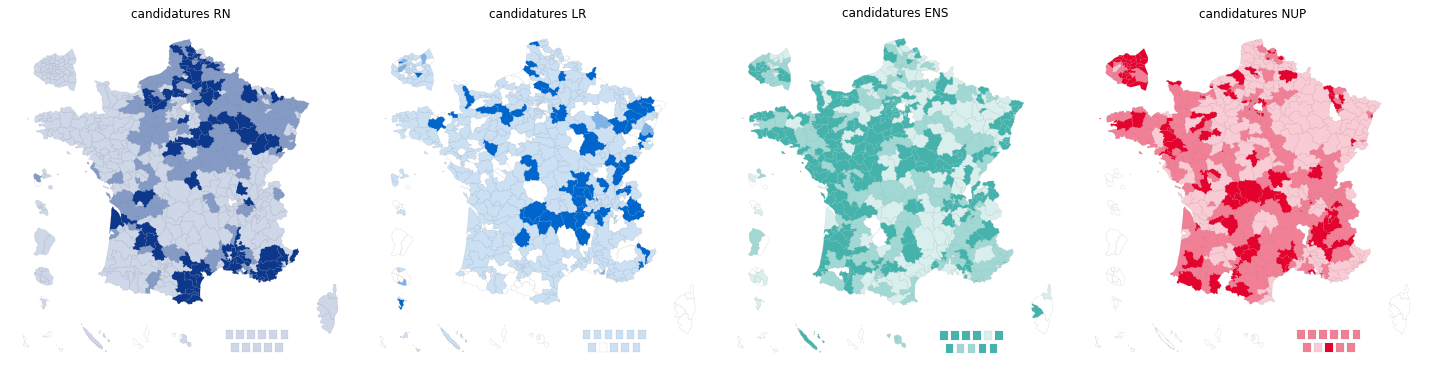

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=4,figsize=(20, 10), sharex='all', sharey='all')

def draw(year, nuance, color, ax):
    #ax.set_axis_off()
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    
    fond.plot(
        color='white',
        edgecolor='#ddd',
        linewidth=0.4,
        ax=ax
    )
    
    (
        fond
        .join(
            (year * nuances_pos) == 1
        )
        .query(f'{nuance} >= 1')
        .plot(
            ax=ax,
            color = color
        )
    )
    
    (
        fond
        .join(
            (year * nuances_pos) > 1
        )
        .query(f'{nuance} >= 1')
        .plot(
            ax=ax,
            color = color,
            alpha=0.5
        )
    )
    
    (
        fond
        .join(
            (year - nuances_pos) > 0
        )
        .query(f'{nuance} >= 1')
        .plot(
            ax=ax,
            color = color,
            alpha=0.2
        )
    )

annees = [
    ('2022', nuances2022),
]


selection = [
    ('RN', '#0D378A'),
    ('LR', '#0066CC'),
    ('ENS', '#45b3ab'),
    ('NUP', '#e4032e'),
]

pad = 0


for (c,(s,_)) in enumerate(selection):
    label = s # if s != 'EXG' else 'NFP'
    ax[c].set_title(f'candidatures { label }')

for (r, (year, df)) in enumerate(annees):
    for (c, (nuance, color)) in enumerate(selection):
        draw(df, nuance, color, ax[c])

fig.patch.set_facecolor('white')
plt.tight_layout()
plt.savefig('lg-2022.png')